# Maschinelles Lernen (ML) - Übung 3
# Perzeptronen und mehrschichtige Perzeptronen
## 3.1 Das einfache Perzeptron als linearer Klassifikator

In dieser Übung wird ein einfaches Perzeptron (engl. perceptron) programmiert, trainiert und als linearer Klassifikator eingesetzt.

![perceptron.pdf](Handout/fig/perceptron/perceptron.png)

Weitere Informationen zur Wirkweise des einfachen Perzeptrons sind im PDF-Handout für diese Übung zu finden.

**Aufgabe 1:** In dieser Übung sollen Sie ein Perzeptron objektorientiert erstellen. Dazu ist bereits eine vorstrukturierte Klasse *Perceptron* mit den Methoden *_init_* zur Initialisierung des Perzeptrons (z.B. Gewichte, Lernrate), *predict* zur Klassifizierung eines Datenpunktes und *fit* zum Trainieren des Perzeptrons vorbereitet.		Vervollständigen Sie diese Methoden.

In [15]:
# matplotlib: Modul zum Plotten von Daten
from matplotlib import pyplot as plt 
# numpy: Mathematikbibliothek
import numpy as np 
import pandas as pd

#### Hilfen für die Klasse Perzeptron

##### Allgemein
Verwendete Variblenbezeichnungen:
- inputs $\hat{=} \textrm{ } \lbrace x_1, \ldots x_n \rbrace$; Sollte als Numpy Array definiert werden.
- eta $\hat{=} \textrm{ } \eta$

##### Methode _init_(self, number_of_inputs, epochs, learning_rate):
In Python entspricht \_\_init\_\_ dem Konstruktor. Die \_\_init\_\_() Methode initialisiert die Klasse Perceptron. Definiere und initialisiere hier die folgenden Variablen: 
- die zu lernenden Gewichte $\textbf{w}$,
- die maximale Anzahl der Epochen (Lernzyklen), die der Lernalgorithmus durchlaufen darf und
- die Lernrate, die den Grad der Veränderung der Gewichte bei jedem Schritt durch die Trainingsdaten bestimmt.

##### Methode predict(self, inputs):
Die predict(...) Methode enthält die Aktivierungsfunktion h(z) (hier: die Signum-Funktion):

\begin{equation}
 h(z) =
 \begin{cases}
			-1 \textrm{ falls } z < 0 \textrm{,} \\	
			0 \textrm{ falls } z = 0 \textrm{,} \\	
			1 \textrm{ falls } z > 0 \textrm{.} \\
		\end{cases}
\end{equation}                  
Die Eingabe der Methode (inputs) sollte als NumPy Array/Vektor definiert werden.

##### Methode fit(self, training_inputs, labels):
Die Methode fit(...) benötigt zwei Argumente:
- training_inputs ist eine Liste von numpy-Vektoren und
- labels ist ein Array von erwarteten Ausgabewerten.
        
Beim Trainieren des Perzeptrons soll folgende Funktionalität implementiert werden: 
Ein einzelner Trainingsdatenpunkt wird betrachtet und eine Vorhersage (Methode predict) getroffen. Auf Basis der Vorhersage $\hat{y}$ werden die Gewichte nach folgender Regel aktualisiert (siehe auch Handout):
\begin{equation}
\textbf{w} \leftarrow \textbf{w} + \eta \cdot \left( y - \hat{y} \right) \cdot \textbf{x} \textrm{.} 
\end{equation}

Der Block aus predict und update der Gewichte wird solange iterativ ausgeführt bis die maximale Anzahl der Epochen erreicht ist (oder optional bis die Fehlerfunktion konvergiert ist).  


In [16]:
class Perceptron(object):
    def __init__(self, number_of_inputs, epochs, eta):
        """
        Beispielaufruf des Konstruktors:
        >>> Perceptron(2, 100, 0.1)
        """
        ### Dein Code kommt hierhin:
        self.weights = np.ones(number_of_inputs+1)
        self.epochs = epochs
        self.eta = eta
        self.bias = 1
        ##########################
        pass

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weights[1:]) + self.weights[0]
           
    def predict(self, inputs):
        """
        Beispiel des Funktionsaufrufes:
        >>> inputs = np.array([0, 1])
        >>> h = perceptron.predict(inputs) 
        """
        # Dein Code kommt hierhin:
        #bias
        return np.where(self.net_input(inputs) >= 0.0, 1, -1)
        ########################## 
        pass

    def fit(self, training_inputs, labels):
        """
        Beispiel des Funktionsaufrufs:
        >>> perceptron.fit(train_input, labels)
        """
        # Dein Code kommt hierhin:
        for e in range(self.epochs):
            for xi, target in zip(training_inputs, labels):
                delta_w = self.eta * (target - self.predict(xi))
                self.weights[1:] += delta_w * xi
                self.weights[0] += delta_w
        ##########################
        pass
            
    def status(self):
        """
        Die Methode status(...) gibt die aktuellen Gewichte aus.

        Beispiel des Funktionsaufrufes und der Ausgabe:
        >>> perceptron.status()
        Perceptron weights:  [0. 1. 1.]
        """
        print("Perceptron weights: ", self.weights)
        
    def getWeights(self):
        return self.weights

**Aufgabe 2:** Wenden Sie das implementierte Perzeptron auf das `AND`, `OR` und `XOR` Problem im zweidimensionalen Raum an. Berechnen Sie anhand der gelernten Gewichte $\mathbf{w}$ des Perzeptrons die Geradengleichung der Diskriminanzgeraden und plotten Sie diese zusammen mit den Datenpunkten des jeweiligen Problems.

[-0.6  0.4  0.4]


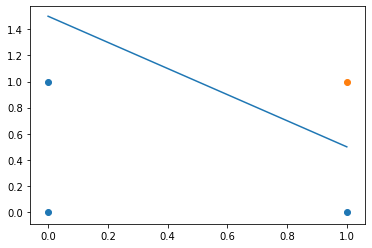

In [22]:
# Beispiel mit AND
train_input_AND = np.array([
                        [0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]
                        ])

labels_AND = np.array([-1, -1, -1, 1])

# Dein Code kommt hier hin:
# Perceptron anlegen und trainieren
perceptron_AND = Perceptron(2,100,0.1)
perceptron_AND.fit(train_input_AND,labels_AND)

# Geradengleichung berechnen und plotten
weights = perceptron_AND.getWeights()
print(weights)

slope = -weights[1]/weights[2]
offset = -weights[0]/weights[2]
x_AND = np.linspace(0,1)
y_AND = slope * x_AND + offset

fig, ax = plt.subplots()
ax.scatter(train_input_AND[(labels_AND==-1),0] , train_input_AND[(labels_AND==-1),1])
ax.scatter(train_input_AND[(labels_AND==1),0] , train_input_AND[(labels_AND==1),1])
plt.plot(x_AND,y_AND)

[-0.2  1.   1. ]


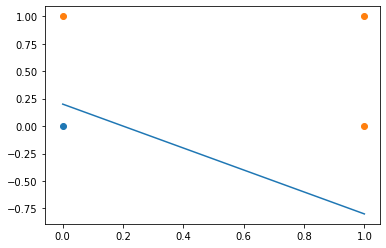

In [25]:
# Beispiel mit OR
train_input_OR = np.array([
                        [0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]
                        ])

labels_OR = np.array([-1, 1, 1, 1])

# Dein Code kommt hier hin:
# Perceptron anlegen und trainieren
perceptron_OR = Perceptron(len(train_input_OR[0]),100,0.1)
perceptron_OR.fit(train_input_OR,labels_OR)

# Geradengleichung berechnen und plotten
weights = perceptron_OR.getWeights()
print(weights)

slope = -weights[1]/weights[2]
offset = -weights[0]/weights[2]
x_OR = np.linspace(0,1)
y_OR = slope * x_OR + offset

fig, ax = plt.subplots()
ax.scatter(train_input_OR[(labels_OR==-1),0] , train_input_OR[(labels_OR==-1),1])
ax.scatter(train_input_OR[(labels_OR==1),0] , train_input_OR[(labels_OR==1),1])
plt.plot(x_OR,y_OR)

[ 5.55111512e-17 -2.00000000e-01  5.55111512e-17]


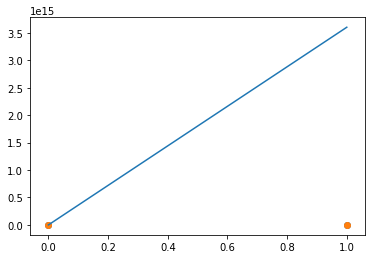

In [32]:
# Beispiel mit XOR
train_input_XOR = np.array([
                        [0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]
                        ])

labels_XOR = np.array([-1, 1, 1, -1])

# Dein Code kommt hier hin:
# Perceptron anlegen und trainieren
perceptron_XOR = Perceptron(len(train_input_XOR[0]),100,0.1)
perceptron_XOR.fit(train_input_XOR,labels_XOR)

# Geradengleichung berechnen und plotten
weights = perceptron_XOR.getWeights()
print(weights)

slope = -weights[1]/weights[2]
offset = -weights[0]/weights[2]
x_XOR = np.linspace(0,1)
y_XOR = slope * x_XOR + offset

fig, ax = plt.subplots()
ax.scatter(train_input_XOR[(labels_XOR==-1),0] , train_input_XOR[(labels_XOR==-1),1])
ax.scatter(train_input_XOR[(labels_XOR==1),0] , train_input_XOR[(labels_XOR==1),1])
plt.plot(x_XOR,y_XOR)

**Aufgabe 3:** Warum wird im Perzeptron der Bias $x_0$ benötigt beziehungsweise wieso werden bei $n$ Merkmalen ($x_1, \ldots, x_n$), $n+1$ Gewichte ($w_0, \ldots, w_n$) benötigt? 

**Antwort:**
Das Bias stellt einen Schwellwert dar. 
Die Summe der Produkte von Eingabewerten und ihren Gewichtungen müssen diesen Schwellwert überschreiten, damit das Perzepton einen Effekt hat.

**Aufgabe 4:** Wenden Sie das Perzeptron auf den Iris-Datensatz der letzten Übung an.
Wählen Sie dazu wieder zwei Merkmale und zwei Zielklassen des Datensatzes. Wie gut funktioniert Ihr Perzeptron?


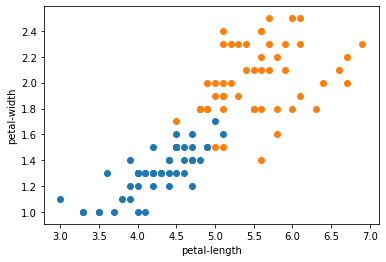

In [20]:
# Hier wird der Iris-Datensatz geladen und vorbereitet (siehe letzte Übung)

# Datensatz laden
names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
iris_data = pd.read_csv("iris.csv", names = names)

# Klassen auswählen (Bei Bedarf ändern)
iris_data = iris_data.loc[lambda x: x['class'] != 'Iris-setosa']

# Merkmale auswählen (Bei Bedarf ändern)
iris_features = ['petal-length', 'petal-width']
X = iris_data[iris_features]

# Pandas-Datenformat in reine Liste umwandeln
X = X.values

# Label vorbereiten
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
iris_data["class_code"] = lb_make.fit_transform(iris_data["class"])
y = iris_data.class_code
# Pandas-Datenformat in reine Liste umwandeln
y = y.values
# Die Signum-Funktion unseres Perzeptrons benötigt die Label -1, 1
y[y==0] = -1
        
# Trainings- und Testdatensplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=.2, random_state=np.random.seed(42)))

# Scatterplot der ausgewählten Merkmale und Klie das Perzeptron auf das Problem der Banknotenklassifizierung der letzten Übung an. Wählen und berechnen Sie dafür wieder zwei geeignete Merkmale der Trainingsbanknoten (Momentenberechnung auf den Farbkanälen mit  `banknotes[i].compute_feature(moment, color)`). Mit welcher Genauigkeit (engl. *accuracy*) werden die Testbanknoten klassifiziert? Wie sind die erreichten Ergebnisse des Perzeptrons im Vergleich zum linearen Klassifikator der letzten Übung zu bewerten?assen
fig, ax = plt.subplots()
ax.scatter(X[(y==-1),0] , X[(y==-1),1])
ax.scatter(X[(y==1),0] , X[(y==1),1])
ax.set(xlabel = iris_features[0], ylabel = iris_features[1])
plt.show()

[-22.2   1.9   8. ]


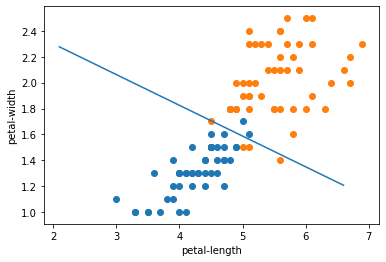

In [37]:
# Perzeptron auf Iris-Datensatz trainieren und anwenden
# Dein Code kommt hierhin:
percepton_iris = Perceptron(2, 100, 0.1)
percepton_iris.fit(X_train,y_train)

weights = percepton_iris.getWeights()
print(weights)

slope = -weights[1]/weights[2]
offset = -weights[0]/weights[2]
x_iris = np.linspace(min(X_train[0]),max(X_train[0]))
y_iris = slope * x_iris + offset

fig, ax = plt.subplots()
ax.scatter(X[(y==-1),0] , X[(y==-1),1])
ax.scatter(X[(y==1),0] , X[(y==1),1])
ax.set(xlabel = iris_features[0], ylabel = iris_features[1])
plt.plot(x_iris, y_iris)
plt.show()

**Aufgabe 5:** Welche(n) Nachteil(e) könnte die symmetrische Aktualisierungsfunktion in Bezug
auf das Anlernen der Gewichte haben?

**Antwort:** 
- Ausreißer haben einen großen Effekt auf die Gewichtung
- Die Lernfähigkeit lässt nach